In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from analysis import Analysis

In [2]:
city_ref = 'grenoble_france'  #'avila_spain'

In [3]:
# Instance of analysis for particular city
city = Analysis(city_ref, pois_shp_path = "cities/"+city_ref+"/full_uses.shp", grid_step=.005)

# Visualize some points
city.pois.head()

('Bounding box:', [45.113017726416615, 5.573125356566398, 45.243980680751875, 5.9029513504478865])
Querying locally for `['pois']`
Found ['pois'] stored locally


,category,key,lat,lon,value
id,,,,,
66383339,activity,inferred,45.148746,5.679552,construction
66384600,activity,inferred,45.149061,5.679569,construction
66388474,activity,inferred,45.149024,5.679637,construction
66388813,activity,inferred,45.148673,5.679924,construction
355175791,activity,inferred,45.151450,5.680675,construction


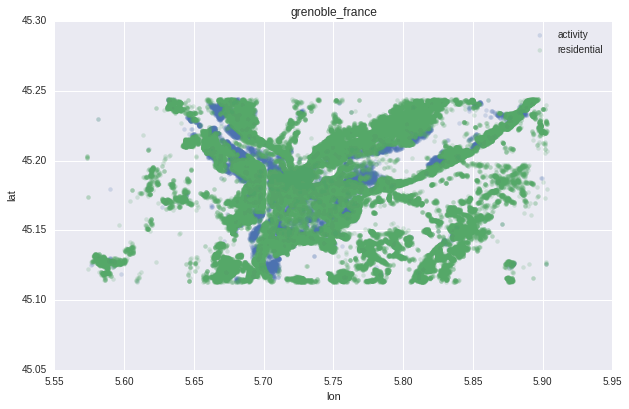

In [4]:
%matplotlib inline
city.scatter_pois(overlap=True)

Querying locally for `['activity_0_005', 'residential_0_005']`
`['activity_0_005', 'residential_0_005']` is/are not stored locally. Determining it/them through `get_grid_all_kde` method
Saving data for `['activity_0_005', 'residential_0_005']` at `/home/lgervasoni/urbansprawl/urban_analysis/hdfs_store/grenoble_france.h5`
The data has been stored locally with success


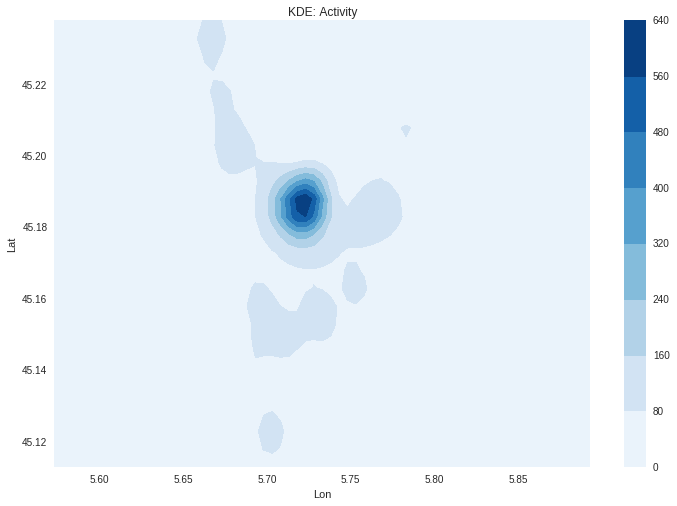

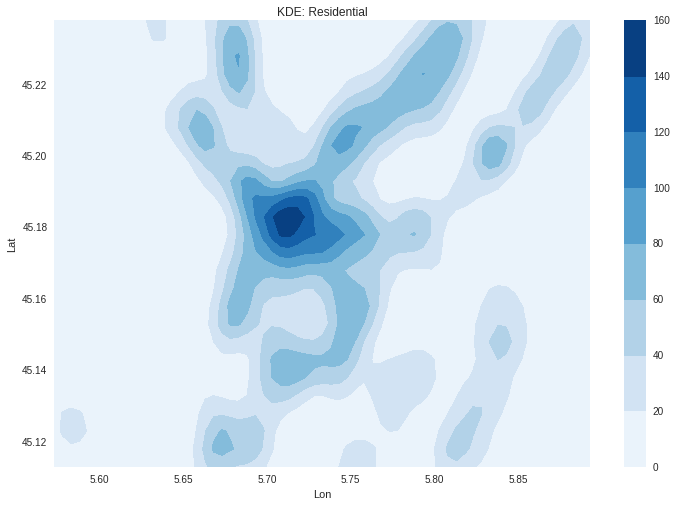

In [5]:
xx, yy = city.grid

import plots
figsize = (12,6)
#plots.plot_(xx,yy,city.f_kde_act,'KDE: Activity', figsize)
plots.plot_contour(xx,yy,city.f_kde_act,"KDE: Activity")
#plots.plot_(xx,yy,city.f_kde_res,'KDE: Residential', figsize)
plots.plot_contour(xx,yy,city.f_kde_res,"KDE: Residential")

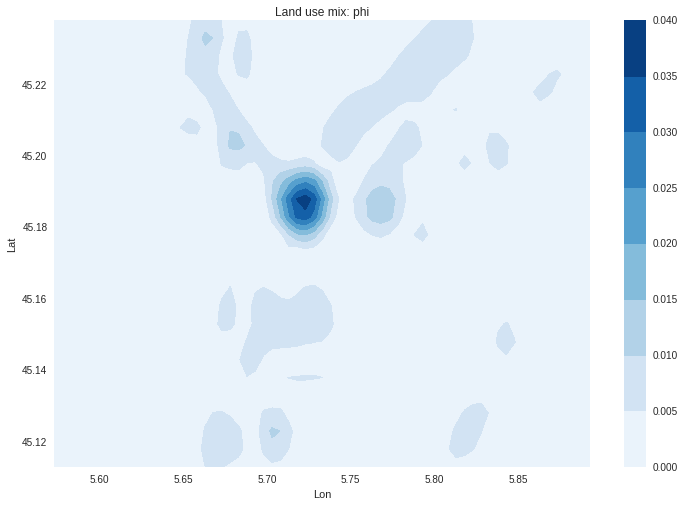

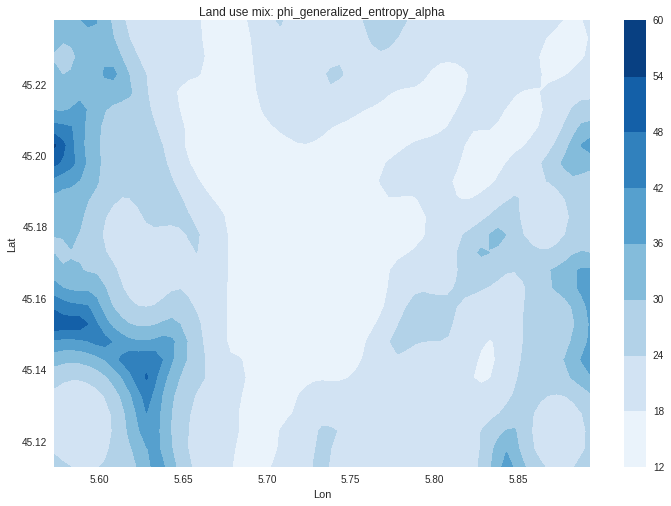

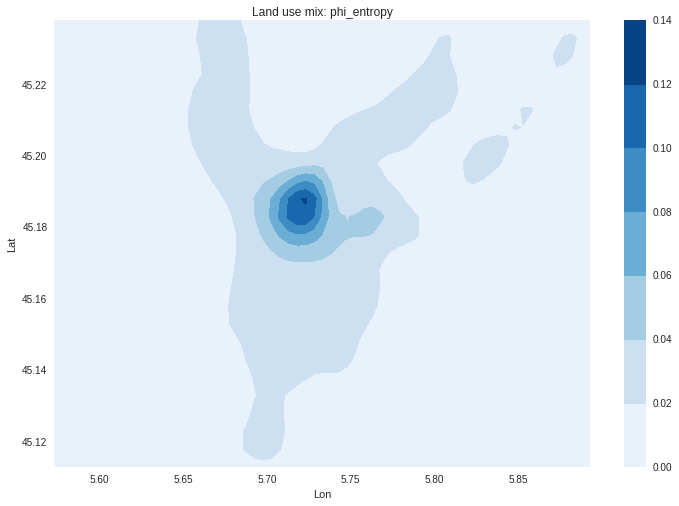

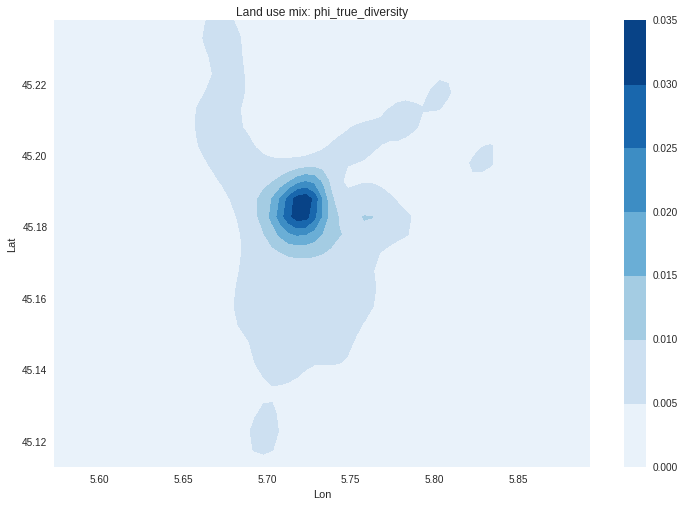

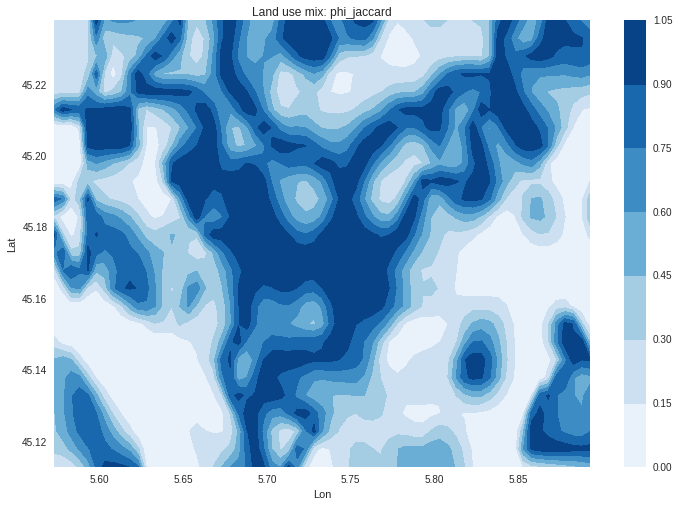

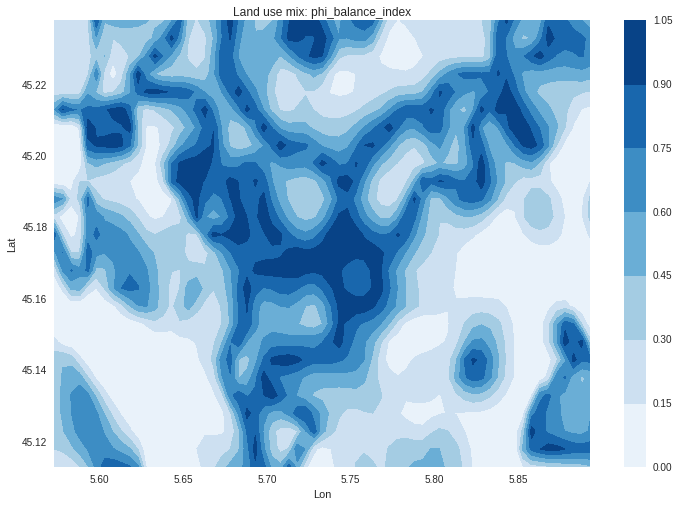

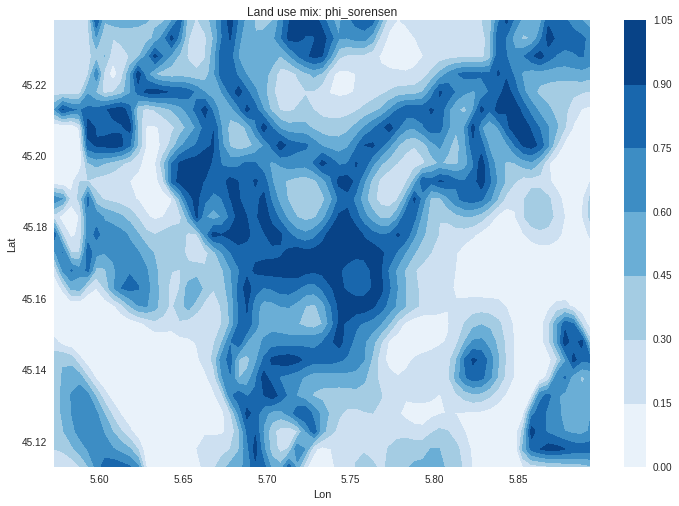

In [6]:
###
import lu_mix
lu_mix_metrics = lu_mix.get_phi_metrics()
lu_mix.normalisation_max = False # True

for i in lu_mix_metrics: # Plot all metrics
    city._f_lu_mix_grid = None
    city._phi_metric = i
    plots.plot_contour(xx,yy,city.f_lu_mix_grid,"Land use mix: "+i)
    #plots.plot_(xx,yy,city.f_lu_mix_grid,'Land use mixity: '+i, figsize)

In [7]:
city.lu_mix

0.44558748692276595

In [8]:
city.moran

{'activity': 0.071022173883851458, 'residential': 0.10377137505930688}

In [9]:
city.relative_entropy

{'activity': 0.8347843470359757, 'residential': 0.91987412549031378}

In [10]:
# Possibility: Set different grid step
#city.grid_step = ...

In [11]:
# Grid cell POIS count
print('Activities')
print ( city.f_count_act )

print('Residential')
print ( city.f_count_res )

print('Total')
print ( city.f_count_total)

Activities
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 2  0  0 ...,  0  0  0]
 ..., 
 [ 0  1  0 ...,  5  2  0]
 [ 0  0  0 ..., 59  1  0]
 [ 0  0  0 ...,  6  7  0]]
Residential
[[  0   0  16 ...,   0   1   1]
 [  1   1  84 ...,   0   0   0]
 [ 11  77 145 ...,   1   1   0]
 ..., 
 [  0   1   0 ..., 110  38  34]
 [  0   0   0 ..., 253  46  23]
 [  0   0   0 ..., 107 229  23]]
Total
[[  0   0  16 ...,   0   1   1]
 [  1   1  84 ...,   0   0   0]
 [ 13  77 145 ...,   1   1   0]
 ..., 
 [  0   2   0 ..., 115  40  34]
 [  0   0   0 ..., 312  47  23]
 [  0   0   0 ..., 113 236  23]]


In [12]:
print_KDE = False
if (print_KDE):
    # Grid cell KDE average values
    print( city.f_kde_res )
    print( city.f_kde_act )

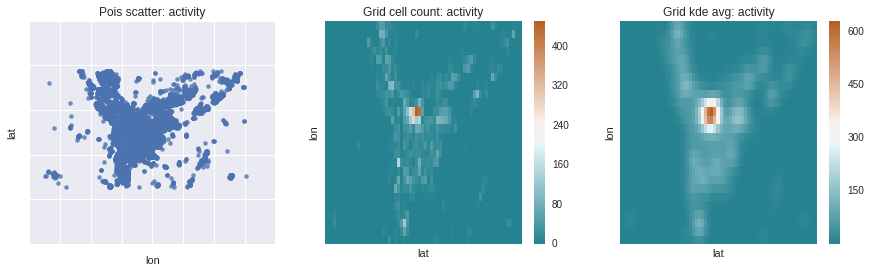

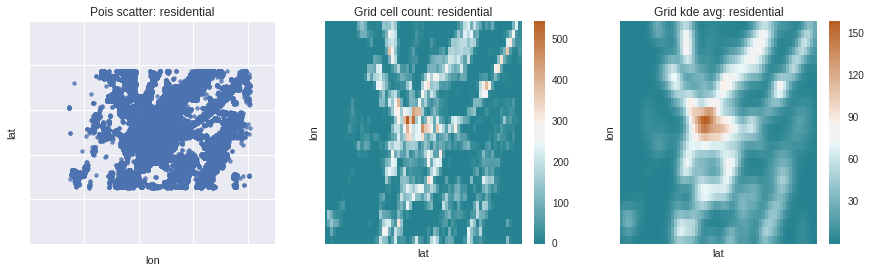

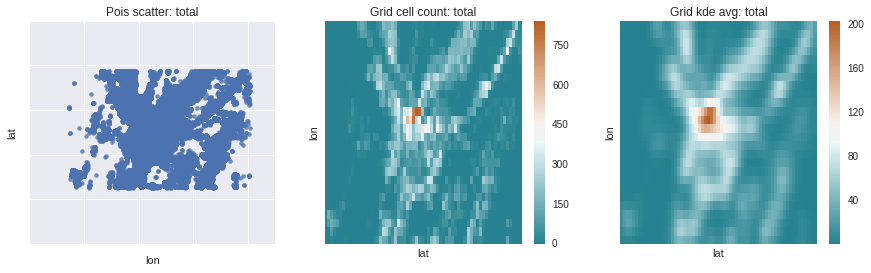

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Pois and kde
grid_cell_counts = [ city.f_count_act, city.f_count_res, city.f_count_total ]
grid_kde_avgs = [ city.f_kde_act, city.f_kde_res, city.f_kde_total ]
categories = [ 'activity', 'residential', 'total' ]
pois = [ city.pois[city.pois['category'] == cat ] for cat in ["activity","residential"] ] + [ city.pois ]

for grid_cell_count, grid_kde_avg, category, pois_ in zip(grid_cell_counts, grid_kde_avgs, categories, pois):
    '''
    plots.pois_scatter(pois_, overlap=True, scatter_kws={'alpha':0.85}, title=cat)
    '''
    # Scatter
    hm_kwargs = {'cmap': sns.diverging_palette(210, 30, s=90, sep=20, as_cmap=True), 'xticklabels': False, 'yticklabels': False}
    fig, axes = plt.subplots(1,3, figsize=(15, 4))
    axes[0].set_title('Pois scatter: '+category)
    sns.regplot('lon', 'lat', data=pois_, ax=axes[0], fit_reg=False)
    axes[0].xaxis.set_ticklabels([])
    axes[0].yaxis.set_ticklabels([])

    # Grids
    for ax, title, mat in zip(axes[1:], ['Grid cell count: '+category, 'Grid kde avg: '+category], map(np.flipud, [grid_cell_count, grid_kde_avg])):
    #for ax, title, mat in zip(axes[1:], ['Grid cell count: '+category, 'Grid kde avg: '+category], [grid_cell_count, grid_kde_avg]):
        ax.set_title(title)
        sns.heatmap(mat, ax=ax, **hm_kwargs)
        ax.set_xlabel('lat')
        ax.set_ylabel('lon')   

plt.show()

In [14]:
''' Integrals: Sensitivity to grid step on the indices 
'''
#TODO: ....

'''
# Min, max and step increase values
grid_min_max_step = [ 10, 100, 10 ]

# Grid step
grid_steps = range(grid_min_max_step[0], grid_min_max_step[1], grid_min_max_step[2])
# LU_mixes vector
lu_mixities = []

for grid_step in grid_steps:
    city.grid_step = grid_step
    lu_mixities.append(city.lu_mix)

# Plot
plt.plot(np.square(grid_steps), lu_mixities)
'''

'\n# Min, max and step increase values\ngrid_min_max_step = [ 10, 100, 10 ]\n\n# Grid step\ngrid_steps = range(grid_min_max_step[0], grid_min_max_step[1], grid_min_max_step[2])\n# LU_mixes vector\nlu_mixities = []\n\nfor grid_step in grid_steps:\n    city.grid_step = grid_step\n    lu_mixities.append(city.lu_mix)\n\n# Plot\nplt.plot(np.square(grid_steps), lu_mixities)\n'

In [15]:
''' Sensitivity to missing data: Simulation
'''
import kde

missing_percentages = np.arange(0, .3, .05)
city_kdes, city_pois = {}, {}
    
for missing_perc in missing_percentages:
    pois = city.pois.copy()
    pois_missing = pois.drop(np.random.choice(pois.index, int(missing_perc*len(pois))))
    city_pois[missing_perc] = pois_missing
    city_kdes[missing_perc] = kde.get_grid_category_kde(pois_missing, city.bbox, city.grid_step)

city_pois
city_kdes

'''
import pandas as pd

import kde
import spatial_measures
from utils import grid_from_bbox

missing_percentages = np.arange(0, .3, .05)

measure_methods = { 'geary' : spatial_measures.adjusted_geary, 'moran' : spatial_measures.moran_index }
measure_pre_methods = { 'count' : spatial_measures.grid_cell_pois_count, 'kde' : spatial_measures.grid_cell_kde_average }
measure_series = {}

for city_ref in city_refs:
    print(city_ref)
    city_measures = {}
    bbox = bboxes[city_ref]
    city_pois = missing_poiss[city_ref]
    city_kdes = missing_kdes[city_ref]
    for measure_key, measure_method in measure_methods.items():
        measure_ser = {}
        for pre_key, pre_method in measure_pre_methods.items():
            pre_ser = []
            for missing_perc in missing_percentages:
                xx, yy = grid_from_bbox(bbox, step)
                if pre_key == 'count':
                    ff = pre_method(city_pois[missing_perc], xx, yy)
                else:
                    ff = pre_method(city_kdes[missing_perc].values)
                pre_ser.append(measure_method(ff, xx, yy))
            measure_ser[pre_key] = pd.Series(pre_ser, index=missing_percentages)
        city_measures[measure_key] = measure_ser
    measure_series[city_ref] = city_measures
    
    
    




import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_cities = len(city_refs)
n_measures = len(measure_methods)

pre_colors = cm.jet_r(np.linspace(0,1,len(measure_pre_methods)))

%matplotlib qt
fig, axes = plt.subplots(n_measures, n_cities, figsize=(4 * n_cities, 4 * n_measures))
[ax.set_title(city_ref) for city_ref, ax in zip(city_refs, axes[0])]
[axs[0].set_ylabel(measure_key, rotation=90) for measure_key, axs in zip(measure_methods.keys(), axes)]
for measure_key, axs in zip(measure_methods.keys(), axes):
    print(measure_key)
    for city_ref, ax in zip(city_refs, axs):
        print(city_ref)
        # city_sample_n = [activity_step_kdes[city_ref][step].size for step in steps]
        city_measure = measure_series[city_ref][measure_key]
        for i, pre_key in enumerate(measure_pre_methods.keys()):
            print(pre_key, city_measure[pre_key].var())
            ax.plot(missing_percentages, city_measure[pre_key], color=pre_colors[i], label=pre_key)
        ax.set_xlabel('n_samples')
            
plt.show()
'''

"\nimport pandas as pd\n\nimport kde\nimport spatial_measures\nfrom utils import grid_from_bbox\n\nmissing_percentages = np.arange(0, .3, .05)\n\nmeasure_methods = { 'geary' : spatial_measures.adjusted_geary, 'moran' : spatial_measures.moran_index }\nmeasure_pre_methods = { 'count' : spatial_measures.grid_cell_pois_count, 'kde' : spatial_measures.grid_cell_kde_average }\nmeasure_series = {}\n\nfor city_ref in city_refs:\n    print(city_ref)\n    city_measures = {}\n    bbox = bboxes[city_ref]\n    city_pois = missing_poiss[city_ref]\n    city_kdes = missing_kdes[city_ref]\n    for measure_key, measure_method in measure_methods.items():\n        measure_ser = {}\n        for pre_key, pre_method in measure_pre_methods.items():\n            pre_ser = []\n            for missing_perc in missing_percentages:\n                xx, yy = grid_from_bbox(bbox, step)\n                if pre_key == 'count':\n                    ff = pre_method(city_pois[missing_perc], xx, yy)\n                else: